In [ ]:
#decoding ubyte data

In [1]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join


# MNIST Data Loader Class

class MnistDataloader(object):
    def __init__(self, 
                 test_images_filepath, test_labels_filepath):
    
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        images = []
        
        with open(labels_filepath, 'rb') as file:
            
            magic, size,rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            label_data = array("B", file.read())
            
        for i in range(size):
             labels.append([0] * rows * cols )
        
        for i in range(size):
            lbl = np.array(label_data[i * rows * cols :(i + 1) * rows * cols ])
            lbl = lbl.reshape((256, 192))
            labels[i][:]= lbl
            break
            
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())  
        
        for i in range(size):
            images.append([0] * rows * cols * 3)
        for i in range(size):
            img = np.array(image_data[i * rows * cols * 3:(i + 1) * rows * cols * 3])
            img = img.reshape((256, 192,3))
            
            images[i][:] = img
        
        return images, labels 
            
    def load_data(self):
        
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return  x_test, y_test

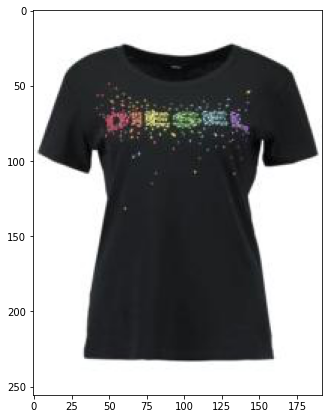

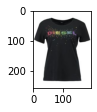

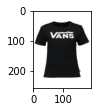

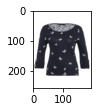

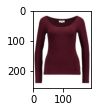

In [4]:
%matplotlib inline
import random
import matplotlib.pyplot as plt


# Set file paths based on added MNIST Datasets

input_path = '../../convert_imaterialist/'
test_images_filepath = join(input_path, 'imat19-test-images-idx3-ubyte')
test_labels_filepath = join(input_path, 'imat19-test-labels-idx3-ubyte')


# Helper function to show a list of images with their relating titles

def show_images(images):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for image in images:                
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)  
        plt.show() 
        index += 1


# Load MINST dataset

mnist_dataloader = MnistDataloader(test_images_filepath, test_labels_filepath)
(x_test, y_test) = mnist_dataloader.load_data()


# Show some random training and test images 

images_2_show = []

for i in range(0, 5):
    r = random.randint(1, 20)
    images_2_show.append(x_test[r])        

show_images(images_2_show)